In [1]:
import numpy as np

In [2]:
X = np.random.rand(50,1)

In [3]:
X = np.sort(X, axis=0)

In [4]:
y = 5*X+2

In [5]:
y += np.random.normal(scale=0.33, size=y.shape)

In [6]:
import matplotlib.pyplot as plt

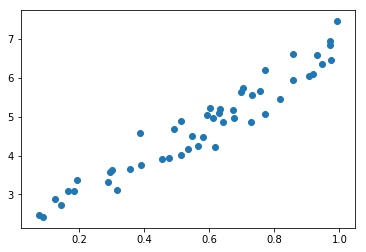

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
weights = model.coef_

In [12]:
weights

array([[4.64508899]])

In [13]:
weights[0][0] # угол

4.645088991959434

In [14]:
bias = (model.predict(X) - weights[0][0]*X)[0][0] # выдергиваем сдвиг модели

In [15]:
bias

2.088557512595645

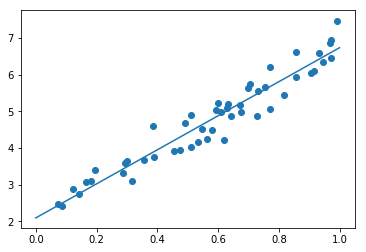

In [16]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.show()

In [17]:
from lightgbm import LGBMRegressor

In [18]:
tree = LGBMRegressor(min_child_samples=1, n_estimators=100, max_depth=10) 

In [19]:
tree.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=10, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

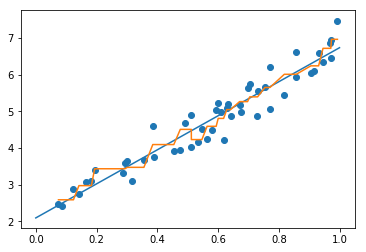

In [20]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.plot(X, tree.predict(X))
plt.show()

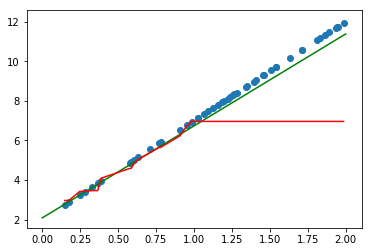

In [21]:
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.scatter(2*X, 5*(2*X)+2)
plt.show()

In [22]:
tree_with_lin_y = LGBMRegressor(min_child_samples=1, n_estimators=2, max_depth=4) 

In [23]:
tree_with_lin_y.fit(X, (y - model.predict(X)))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=4, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

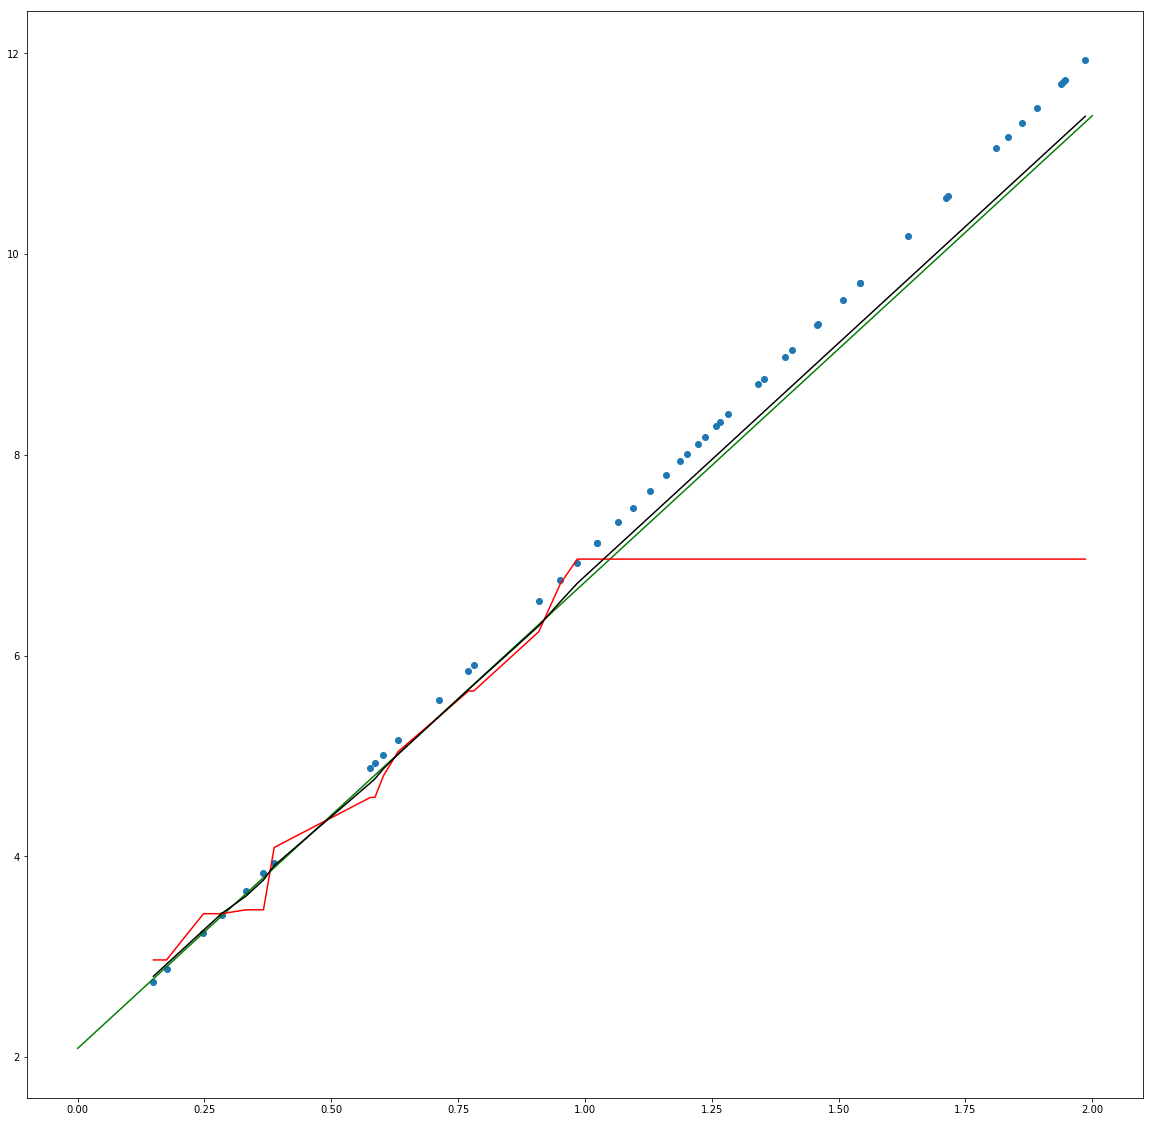

In [24]:
plt.figure(figsize=(20,20))
plt.scatter(2*X, 5*(2*X)+2)
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.plot(2*X, tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0], color='black')
plt.show()

In [25]:
(tree_with_lin_y.predict(2*X) + model.predict(2*X)).shape

(50, 50)

In [26]:
tree_with_lin_y.predict(2*X)

array([ 0.02486583,  0.02486583,  0.02486583,  0.02486583, -0.02398293,
       -0.02398293,  0.02106745, -0.03618734, -0.03618734, -0.01376065,
       -0.00426178, -0.00426178, -0.00426178, -0.00426178, -0.01341635,
        0.03020781,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501,
        0.05828501,  0.05828501,  0.05828501,  0.05828501,  0.05828501])

In [27]:
model.predict(2*X).T[0]

array([ 2.78224523,  2.90192607,  3.24037498,  3.40791408,  3.6294474 ,
        3.78968659,  3.88830543,  4.76959435,  4.81068186,  4.88816143,
        5.02235532,  5.39542931,  5.6668948 ,  5.71540923,  6.31034137,
        6.50834236,  6.66322389,  6.84559266,  6.84709436,  7.03772569,
        7.1692024 ,  7.32781196,  7.4763904 ,  7.60570291,  7.66797048,
        7.76553829,  7.83293763,  7.93142247,  7.9664252 ,  8.04496509,
        8.32152349,  8.36980802,  8.56573302,  8.6334551 ,  8.8616592 ,
        8.87217128,  9.09622371,  9.25040223,  9.25073925,  9.69030774,
       10.04288049, 10.05625647, 10.50139986, 10.6094931 , 10.73931216,
       10.87413506, 11.09390827, 11.11288592, 11.13129938, 11.31500239])

In [28]:
### TODO: Compare with Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [29]:
X.shape

(50, 1)

In [30]:
y.shape

(50, 1)

In [31]:
class net(nn.Module):
    def __init__(self,):
        super(net, self).__init__()
        self.seq = nn.Sequential(nn.Linear(1, 1), 
                                 nn.ReLU(),
                                 nn.Linear(1, 1)
                                )
#         self.layer_1 = nn.Linear(1, 1)
#         self.activation = nn.ReLU()
#         self.layer_2 = nn.Linear(1, 1)
#         self.activation = nn.ReLU()
    
    def forward(self, X):
        return self.seq(X)
#         out = self.layer(X)
#         return self.activation(out)

In [32]:
X_tensor = torch.from_numpy(X).float()

In [33]:
y_tensor = torch.from_numpy(y)

In [34]:
nn_model = net()
optimizer = optim.SGD(nn_model.parameters(), lr=0.1)

for epoch in range(1, 31):
    optimizer.zero_grad()
    _y = nn_model.forward(X_tensor)
#     print(type(_y))
    loss = F.mse_loss(y_tensor, _y.double())
    print('Epoch: ', epoch, 'Loss value: ', loss.item())
    loss.backward()
    optimizer.step()
    

Epoch:  1 Loss value:  21.422200223132727
Epoch:  2 Loss value:  6.274144017411472
Epoch:  3 Loss value:  1.4724362572140874
Epoch:  4 Loss value:  0.7144112389984246
Epoch:  5 Loss value:  0.6744335197538273
Epoch:  6 Loss value:  0.6419882491131914
Epoch:  7 Loss value:  0.6114599614810805
Epoch:  8 Loss value:  0.5819085049662239
Epoch:  9 Loss value:  0.5532363162974758
Epoch:  10 Loss value:  0.5254525410965493
Epoch:  11 Loss value:  0.49858388999820413
Epoch:  12 Loss value:  0.4726597532238613
Epoch:  13 Loss value:  0.44770963810341935
Epoch:  14 Loss value:  0.4237610186339504
Epoch:  15 Loss value:  0.40083915512538715
Epoch:  16 Loss value:  0.3789652872665565
Epoch:  17 Loss value:  0.3581565325357201
Epoch:  18 Loss value:  0.3384248523691826
Epoch:  19 Loss value:  0.31977675513208054
Epoch:  20 Loss value:  0.30221275822779703
Epoch:  21 Loss value:  0.28572734506647585
Epoch:  22 Loss value:  0.2703087945278247
Epoch:  23 Loss value:  0.2559392789953619
Epoch:  24 Loss

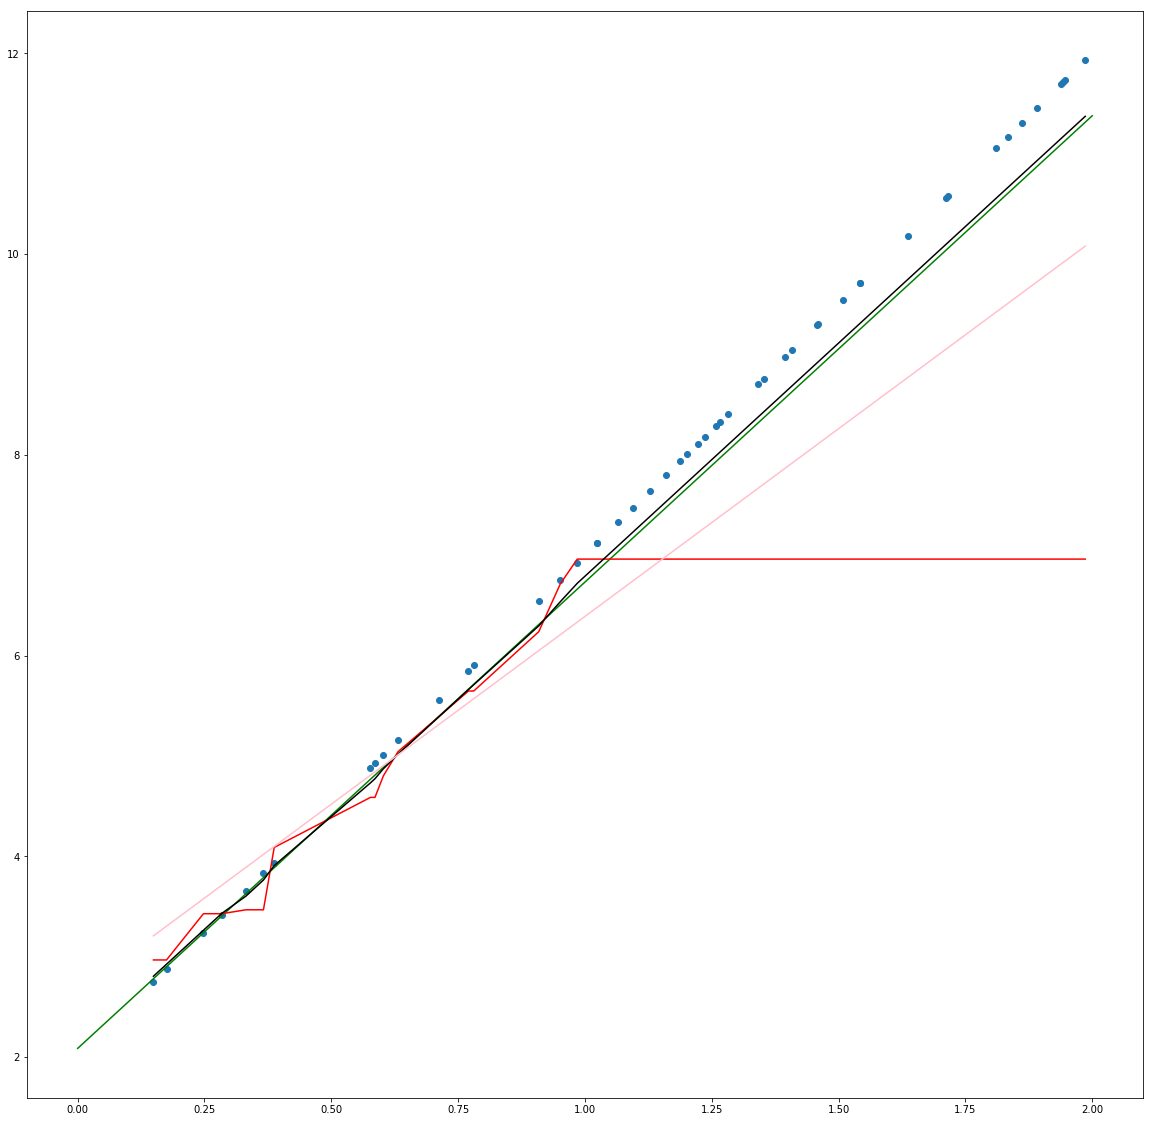

In [35]:
plt.figure(figsize=(20,20))
plt.scatter(2*X, 5*(2*X)+2)
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.plot(2*X, tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0], color='black')
plt.plot(2*X, nn_model(X_tensor*2).data.numpy(), color='pink')
plt.show()

In [42]:
linreg_ = 2*X*weights[0][0] + bias
lgbm_ = tree.predict(2*X)
linreg_lgbm = tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0]
nn_model_ = nn_model(X_tensor*2).data.numpy()

In [54]:
preds = [linreg_[:,0], lgbm_, linreg_lgbm, nn_model_[:,0]]

In [56]:
[i.shape for i in preds]

[(50,), (50,), (50,), (50,)]

In [61]:
blend_X = np.vstack([i for i in preds]).T

In [65]:
from sklearn.linear_model import Ridge

In [72]:
from sklearn.metrics import mean_absolute_error

In [83]:
from collections import OrderedDict

In [84]:
result = OrderedDict()
for i in np.logspace(-10, 10, num=100):
    blend_model = Ridge(alpha=i)
    blend_model.fit(blend_X, y)
    err = mean_absolute_error(y, blend_model.predict(blend_X))
    coef = blend_model.coef_[0]
    if np.all(np.abs(coef) < 1):
        result[err] = coef

In [85]:
result

OrderedDict([(0.27584072430277773,
              array([ 0.07513565, -0.11717631, -0.17388949,  0.8125822 ])),
             (0.2758407278513093,
              array([ 0.21178731, -0.11717641, -0.17388084,  0.64286805])),
             (0.27584073137309323,
              array([ 0.29760394, -0.11717657, -0.17386735,  0.53627828])),
             (0.275840735643804,
              array([ 0.35149157, -0.11717681, -0.17384606,  0.46933041])),
             (0.2758407416037983,
              array([ 0.38532217, -0.1171772 , -0.17381228,  0.42727514])),
             (0.27584075056478613,
              array([ 0.40654902, -0.11717781, -0.17375857,  0.40084724])),
             (0.275840764497569,
              array([ 0.41984862, -0.11717879, -0.17367313,  0.38422438])),
             (0.2758407864630629,
              array([ 0.42815105, -0.11718034, -0.1735372 ,  0.37374439])),
             (0.27584082127864706,
              array([ 0.43328553, -0.11718281, -0.17332096,  0.36709848])),
        

In [106]:
for item in result.values():
    r = item
    break
print(r)

[ 0.07513565 -0.11717631 -0.17388949  0.8125822 ]


In [108]:
r = next(iter(result.values()))
r

array([ 0.07513565, -0.11717631, -0.17388949,  0.8125822 ])

In [71]:
blend_model.coef_

array([[1.46101191e-08, 6.45469264e-09, 1.47386240e-08, 1.17646287e-08]])

In [ ]:
# TODO: Pipeline для Torch с передачей данных